# Question 2_A - Shallow Neural Network

The goal of this assignment is to implement a fully connected neural network with a single hidden layer and a ReLU (Rectified Linear Unit) activation function. The network should be flexible enough to accommodate any number of units in the hidden layer and any size of input, while having just one output unit.

## 1.1 Network Architecture

- The simple linear regression can be visualized as a neural network:
  - **Input Layer**: It accepts the input feature.
  - **Hidden Layer**: Contains one unit which simply passes the value.
  - **Bias Layer**: An added constant to introduce flexibility to the model.
  - **ReLU Activation**: Introduces non-linearity into the model. This means that the model using ReLU can be trained to approximate complex, non-linear functions, which is essential for learning from the data.
  - **Output Layer**: Produces the prediction for the given input.

Mathematically, the output of the network is represented as:
<!-- $$ a_1 = Xw_0 + a_0 + b_1 $$ -->

$$ \ a_2 = \sum_{k=1}^{d} Xw_{2k} a_{1k} + b_2 \ $$
$$ OR $$
$$ \hat{y} = g(\mathcal{H^{l}} \mathcal{W^{(l+1)}} + \mathcal{b^{(l+1)}}) $$

Expected output for your predictions should look like the plot below:

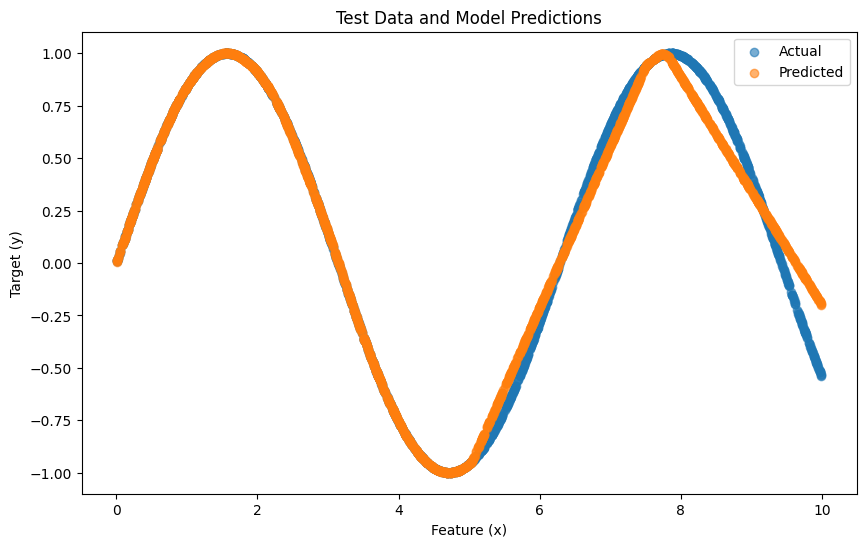
<!-- $$ \frac{1}{n} \sum_{i=1}^{n} (y_i - a_1(x_i))^2 $$ -->



In [1]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
# This Cell Imports all the required Libraries.
import numpy as np
from typing import List
import collections.abc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
np.random.seed(42)

---

### Data Utility Functions

This section provides utility functions to generate and manipulate data, mainly focusing on data splitting and data generation.

---

#### 1. `train_test_split` Function:

This function is responsible for splitting the given data into training and testing sets based on the specified `test_size` fraction.

- **Input**:
  - `x`: Feature data.
  - `y`: Target labels.
  - `test_size`: Fraction of the dataset to be used as testing data (default is 0.2, i.e., 20%).

- **Output**:
  - Training and testing data for both features and labels.

---

#### 2. `generate_sine_data` Function:

Generates data based on the sine function. This function simulates a non-linear relationship.

- **Parameters**:
  - `num_samples`: Number of data points to generate.
  - `dimension`: Dimension of the input data.
  - `amplitude`, `frequency`, `phase`: Parameters of the sine function.
  - `categorical`: If set to `True`, the output is binarized based on the median value.
  
- **Output**:
  - Training and testing data for both features and labels.

---

#### 3. `generate_data` Function:

Generates linear data with optional noise. This function simulates a linear relationship.

- **Parameters**:
  - `num_samples`: Number of data points to generate.
  - `dimension`: Dimension of the input data.
  - `m` and `b`: Slope and intercept of the linear relationship.
  - `categorical`: If set to `True`, the output is binarized based on the median value.
  
- **Output**:
  - Training and testing data for both features and labels.

---

#### Utility Functions:

- `q2_a` and `q2_b`: 
  - These functions are wrappers around the data generating functions. They ensure that data is correctly formatted and split before being used in the subsequent processing.

---

**Note**: The main intent behind these utility functions is to ease the data generation and preparation steps. You do not need to edit these functions for most tasks. They're here to ensure you have the necessary data structure for your experiments.

---


In [2]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################

def train_test_split(x, y, test_size=0.2):

    # Split data
    num_samples = len(x)
    num_test = int(test_size * num_samples)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    test_indices = indices[:num_test]
    train_indices = indices[num_test:]

    x_train = [x[i] for i in train_indices]
    x_test = [x[i] for i in test_indices]

    y_train = [y[i] for i in train_indices] 
    y_test = [y[i] for i in test_indices]

    return x_train, x_test, y_train, y_test
  

def generate_sine_data(num_samples=100, dimension=1, test_size=0.2, amplitude=1, frequency=1, phase=0, low=0, high=10, categorical=False):
    x = np.random.uniform(low=low, high=high, size=(num_samples, dimension))

    if dimension == 1:
        y = amplitude * np.sin(frequency * x + phase)
    else:
        y = np.zeros((num_samples, 1))
        for d in range(dimension):
            y += amplitude * np.sin(frequency * x[:, d].reshape(-1, 1) + phase)

    if categorical:
        median = np.median(y)
        labels = np.zeros(num_samples, dtype=int)
        labels[y[:, 0] <= median] = 0
        labels[y[:, 0] > median] = 1
        y = labels
        y = y.astype(int)
        y = y.reshape(-1, 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size)

    return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

def generate_data(num_samples=100, dimension=1, test_size=0.2, m=7, b=3, low=0, high=10, categorical=False):

    # Generate x values
    x = np.random.uniform(low=low, high=high, size=(num_samples, dimension))

    # Compute y values with noise
    if dimension == 1:
        # noise = np.random.normal(loc=0, scale=1, size=num_samples)
        noise = np.random.normal(loc=0, scale=1, size=(num_samples, 1))
        y = (m * x) + b + noise
    
    else:
        noise = np.random.normal(loc=0, scale=1, size=num_samples)
        y = np.dot(x, np.array([m] * dimension)) + b + noise

    y = y.reshape(-1, 1)  # Make y a column vector

    if categorical:
        median = np.median(y)
        labels = np.zeros(num_samples, dtype=int)
        labels[y[:, 0] <= median] = 0
        labels[y[:, 0] > median] = 1
        print(median)
        y = labels
        y = y.astype(int)
        y = y.reshape(-1, 1)
        
    # Split data into train/test
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size)

    return xtrain, xtest, ytrain, ytest

def q2_a():
    xtrain, xtest, ytrain, ytest = generate_sine_data(num_samples=10000, dimension=1, test_size=0.2)
    xtrain, xtest, ytrain, ytest = np.array(xtrain, dtype=np.float32), np.array(xtest, dtype=np.float32), np.array(ytrain, dtype=np.float32), np.array(ytest, dtype=np.float32)
    print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    print(xtrain)
    print(ytrain)
    return {
        "train": (xtrain, ytrain),
        "test": (xtest, ytest)
    }


def q2_b():
    xtrain, xtest, ytrain, ytest = generate_sine_data(num_samples=100000, dimension=5, test_size=0.2, low=0, high=10)
    xtrain, xtest, ytrain, ytest = np.array(xtrain, dtype=np.float32), np.array(xtest, dtype=np.float32), np.array(ytrain, dtype=np.float32), np.array(ytest, dtype=np.float32)
    print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    print(xtrain)
    print(ytrain)
    return {
        "train": (xtrain, ytrain),
        "test": (xtest, ytest)
    }




---

### `LinearLayer` Class: Fully Connected Layer

This class represents a fully connected (or linear) layer within a neural network. This is the foundation of dense layers in many deep learning models, where every neuron in the current layer is connected to every neuron in the next layer.

---

#### Attributes:

- **`input_layer`**: The preceding layer in the neural network.
- **`output_dimension`**: Specifies the number of neurons in the current layer.
- **`W`**: Weights matrix that will be learned during training.

---

#### Methods:

1. **`__init__(self, input_layer, number_out_features)`**: 
    - Initializes the layer based on the dimensions of the input layer and the desired number of output features.
    - Ensures that the input layer contains a list of 1D linear feature data.
    - Initializes weights randomly.

2. **`forward(self)`**:
    - Computes the forward pass for the layer, essentially multiplying the input data by the weight matrix (`XW`).

3. **`backward(self, downstream)`**:
    - Computes the backward pass, propagating the gradient backward to the input layer and adjusting weights based on the propagated gradient.

---

**Note**: Care has been taken to ensure that the weights are not initialized with NaN or Infinity values, and this is checked again during the forward pass. It's essential to ensure that these do not propagate through the neural network, as they would lead to unstable training dynamics.

---


In [3]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################

class LinearLayer:
    """
    A class representing a fully connected (linear) layer in a neural network.
    
    Methods:
        forward(): Computes the forward pass of the layer.
        backward(dwnstrm): Computes the backward pass, propagating the gradient.
    """

    def __init__(self, input_layer, number_out_features) -> None:
        """
        Initialize the layer.

        Parameters:
            input_layer: The preceding layer in the neural network.
            output_dimension: Number of neurons in the current layer.
        
        Raises:
            AssertionError: If input layer dimensions are not a list of 1D linear feature data.
        """
        assert len(input_layer.output_dimension) == 2, "Input layer must contain a list of 1D linear feature data."
        self.input_layer = input_layer
        num_data, num_in_features = input_layer.output_dimension
        self.output_dimension = np.array([num_data, number_out_features])
        assert num_in_features > 0, "num_in_features should be greater than 0"
        np.random.seed(42)

        self.W = np.random.randn(num_in_features, number_out_features) / np.sqrt(num_in_features)
        assert not np.isnan(self.W).any(), "Initial weights contain NaN"
        assert not np.isinf(self.W).any(), "Initial weights contain Inf"



    def forward(self):
        """
        Compute the forward pass for the layer, i.e., compute XW.
        """
        self.input_array = self.input_layer.forward()
        assert not np.isnan(self.input_array).any(), "Input array contains NaN"
        assert not np.isnan(self.W).any(), "Weights contain NaN before update"
        assert not np.isinf(self.W).any(), "Weights contain Inf before update"

        self.output_array = self.input_array @ self.W
        return self.output_array

    def backward(self, downstream):
        """
        Compute the backward pass for the layer, propagating the gradient backward.
        """
        self.G = self.input_array[:, :, np.newaxis] * downstream[:, np.newaxis]

        input_grad = (self.W @ downstream[:, :, np.newaxis]).squeeze(axis=-1)
        self.input_layer.backward(input_grad)


---

### `HiddenLayer` Class

`HiddenLayer` is a class that models a hidden layer in a neural network. Building on the foundation of the `LinearLayer` class, it introduces activation functionality to it. As the name suggests, this layer is generally used in the middle layers of deep neural networks to enable non-linear transformations of the input data.

---

#### Methods:

1. **Constructor: `__init__(self, input_dimension, output_dimension)`**
    - **Purpose**: Initializes the HiddenLayer.
    - **Parameters**:
        - `input_dimension`: Specifies the number of input features.
        - `output_dimension`: Dictates the number of output features or neurons in the hidden layer.
    - **Behavior**: Calls the constructor of the parent `LinearLayer` class to handle weight initialization and set up dimensions.

2. **`forward(self)`**:
    - **Purpose**: Handles the forward propagation of data in the neural network.
    - **Behavior**: Takes input data and conducts a linear transformation. In this implementation, an activation function's operation is implied but not explicitly included. For real-world cases, an activation like ReLU, Sigmoid, etc., would be applied to the output of this function.
    - **Returns**: 
        - `_out`: The linearly transformed data.

3. **`backward(self, downstream)`**:
    - **Purpose**: Handles the backward propagation, which is essential for training neural networks using gradient-based optimization algorithms.
    - **Parameters**:
        - `downstream`: Represents the gradient of the loss concerning the output of this layer.
    - **Behavior**: Computes the gradient concerning the inputs and weights of this layer by considering both the gradient of the activation function and the linear transformation.

---

**Note**: The utility of this layer comes into full effect when combined with non-linear activation functions. This combination allows neural networks to capture and model more complex and nuanced relationships in the data.

---


In [5]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################

class HiddenLayer(LinearLayer):
    """
    Represents a hidden layer in a neural network. Inherits from the LinearLayer class
    and adds activation functionality.
    
    Methods:
    --------
    forward(): Performs the forward pass, including linear transformation and activation.
    backward(downstream): Performs the backward pass, including both activation and linear gradients.
    """
    def __init__(self, input_layer, output_dimension) -> None:
        """
        Initializes the HiddenLayer.
        
        Parameters:
        -----------
        input_layer: The input layer.
        output_dimension: The number of output features.
        """
        super().__init__(input_layer, output_dimension)

    def forward(self):
        """
        Performs the forward pass by first conducting the linear transformation and then the activation.
        
        Returns:
        --------
        _out: The linearly transformed data.
        """
        _out = super().forward()
        return _out
    
    def backward(self, downstream):
        """
        Performs the backward pass by propagating the gradient through the activation function
        and then through the linear transformation.
        
        Parameters:
        -----------
        downstream: The gradient of the loss with respect to the output of this layer.
        """
        super().backward(downstream=downstream)
        
        

---

## `LinearActivation` Class Documentation

---

### Overview
The `LinearActivation` class implements the linear activation function. This is essentially the identity function: for any input `x`, the output will be `x`. This activation is typically used in the output layer for regression tasks.

---

### Methods

#### `forward(input_array: np.ndarray) -> np.ndarray`
- **Purpose**: Computes the forward pass for linear activation.
- **Parameters**: `input_array`: Input data or activations from the previous layer.
- **Returns**: The same as `input_array`, because the linear activation doesn't change its input.
- **Description**: For the linear activation, the output is the same as the input.

---

#### `backward(downstream: np.ndarray, input_array=None) -> np.ndarray`
- **Purpose**: Computes the backward pass (gradient) for linear activation.
- **Parameters**: 
  - `downstream`: The gradient of the loss function with respect to the output of the linear activation.
- **Returns**: Gradient of the loss with respect to the input of the linear activation.
- **Description**: The derivative of the linear function is 1, so this operation multiplies it by the downstream gradient. However, since the derivative is 1, this operation doesn't change the downstream gradient.

---



In [6]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
class LinearActivation:
    """
    Implements the linear activation function. 

    This activation is essentially the identity function. For any input 'x', the output will be 'x'.
    It's commonly used in the output layer for regression tasks.

    Methods:
        forward(): Computes the forward pass by simply returning the input.
        backward(): Computes the backward pass (derivative) which is 1 for the linear activation.
    """
    @staticmethod
    def forward(input_array):
        """
        Computes the forward pass for linear activation.

        Parameters:
            input_array (np.ndarray): Input data or activations from the previous layer.

        Returns:
            np.ndarray: Same as input_array, as the linear activation doesn't change its input.
        """
        # For linear activation, the output is same as input
        return input_array
    
    @staticmethod
    def backward(downstream, input_array=None):
        """
        Computes the backward pass (gradient) for linear activation.

        Parameters:
            downstream_gradient (np.ndarray): The gradient of the loss function with respect to the output of the linear activation.

        Returns:
            np.ndarray: Gradient of the loss with respect to the input of the linear activation.
        """
        # The derivative of the linear function is 1, so we just multiply it by the downstream gradient
        # However, since the derivative is 1, this operation doesn't change the downstream gradient.
        return 1 * downstream


---

## `SigmoidActivation` Class Documentation

---

### Overview
The `SigmoidActivation` class implements the Sigmoid activation function. The sigmoid function is defined as: 
$$\ f(z) = \frac{1}{1 + e^{-z}} \ $$
where:
- \( z \) is the input
- \( e \) is the base of natural logarithms (approximately equal to 2.71828)

### Attributes:
- `input_layer`: The layer that provides input to this activation function.

---

### Methods:

#### `forward(input_array: np.ndarray) -> np.ndarray`
- **Purpose**: Applies the Sigmoid activation function to the output of the input layer.
- **Parameters**: `input_array`: Array of inputs to be passed through the sigmoid activation function.
- **Returns**: The output after applying the sigmoid activation.
- **Description**: 
  - Computes the negative exponential for every element in `input_array` using `np.exp()`.
  - Calculates the denominator by adding 1 to every element of the previously computed negative exponential.
  - Divides 1 by the computed denominator to get the sigmoid value.

---

#### `backward(downstream: np.ndarray, input_array: np.ndarray) -> np.ndarray`
- **Purpose**: Computes the gradient of the loss with respect to the input, and passes this back to the previous layers.
- **Parameters**: 
  - `downstream`: The gradient of the loss with respect to the output of the sigmoid function.
  - `input_array`: The original input to the sigmoid function.
- **Returns**: Gradient of the loss with respect to the input of the sigmoid function.
- **Description**: 
  - Uses the sigmoid formula from the forward function to get the sigmoid value.
  - Computes the derivative of the sigmoid function using the formula: 
  $$ \ ( f'(z) = f(z) \times (1 - f(z)) \ ) $$
  - Calculates the gradient with respect to the input.

---


In [7]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#
class SigmoidActivation:
    """
    Implements the Sigmoid activation function.
    
    The sigmoid function is defined as: f(z) = 1 / (1 + e^{-z})

    
    Attributes:
        input_layer: The layer that provides the input to this activation function.
        
    Methods:
        forward(input_array): Applies the Sigmoid activation function to the output of the input layer.
        backward(downstream, input_array): Computes the gradient of the loss with respect to the input, which is then passed back to the previous layers.
    """

    
    @staticmethod
    def forward(input_array):
        """
        Compute the sigmoid activation for each element in the input_array.
        
        The sigmoid activation function is defined as:
        f(z) = 1 / (1 + e^(-z))
        
        where:
        - z is the input
        - e is the base of natural logarithms (approximately equal to 2.71828)
        
        Parameters:
        - input_array: Array of inputs to be passed through the sigmoid activation function.
        
        Returns:
        - sigmoid: Array of outputs after applying the sigmoid activation.
        """
        # Apply the Sigmoid activation function to the input array
        # TODO 1. Compute the Exponential Term: For every element in the input array, you'll compute the negative exponential. 
        # In numpy, the function to compute the exponential of each element of an array is np.exp(). Using this function, 
        # compute the negative exponential of the input array.
        negative_exponential = np.exp(-input_array)
        # TODO 2. Compute the Denominator: Add 1 to every element of the previously computed negative_exponential array.
        denominator = 1 + negative_exponential
        # TODO 3. Divide 1 with the previously computed demonimator. 
        sigmoid = 1 / denominator
        return sigmoid


    @staticmethod
    def backward(downstream, input_array):
        """
        Compute the gradient of the loss with respect to the input of the sigmoid function.
        
        The derivative of the sigmoid function f(z) with respect to its input z is:
        f'(z) = f(z) * (1 - f(z))

        where:
        f(z) is sigmoid

        Parameters:
        - downstream: The gradient of the loss with respect to the output of the sigmoid function.
        - input_array: The original input to the sigmoid function.

        Returns:
        - input_grad: The gradient of the loss with respect to the input of the sigmoid function (the derivative of the sigmoid function).
        """
        # Compute the gradient of the loss with respect to the input
        # TODO Duplicate the sigmoid code from the forward function here
        sigmoid = forward(input_array)
        # TODO Compute the derivative of the sigmoid function 
        sigmoid_derivative = sigmoid * (1 - sigmoid)
        # TODO Compute the gradient with respect to the input by multiplying the gradient of the loss with respect to the output of sigmoid 
        # (downstream) by the derivative of the sigmoid (sigmoid_derivative) you computed above
        input_grad = downstream * sigmoid_derivative
        return input_grad

---

## `ReLUActivation` Class Documentation

---

### Overview
The `ReLUActivation` class implements the Rectified Linear Unit (ReLU) activation function. The ReLU function is defined as: 
$$ \ f(z) = \max(0,z) \ $$

### Attributes:
- **input_layer**: The layer that provides input to this activation function.
- **input_dimension**: The shape of the output from the `input_layer`.
- **output_dimension**: The shape of the output of this layer. For ReLU, this is the same as `input_dimension`.

---

### Methods:

#### `forward(input_array: np.ndarray) -> np.ndarray`
- **Purpose**: Applies the ReLU activation function to the output of the `input_layer`.
- **Parameters**: 
  - `input_array`: Array of inputs to be passed through the ReLU activation function.
- **Returns**: The output after applying the ReLU activation.
- **Description**: 
  - Uses the numpy function `np.maximum()` to return the element-wise maximum values from two arrays.
  - For the ReLU activation, this means \( f(x) = \max(0, x) \) where \( x \) is `input_array`.

---

#### `backward(downstream: np.ndarray, input_array: np.ndarray = None) -> np.ndarray`
- **Purpose**: Computes the gradient of the loss with respect to the input, and passes this back to the previous layers.
- **Parameters**: 
  - `downstream`: The gradient of the loss with respect to the output of the ReLU function.
  - `input_array`: The original input to the ReLU function. This is optional.
- **Returns**: Gradient of the loss with respect to the input of the ReLU function.
- **Description**: 
  - Computes the input gradient by multiplying the `downstream` gradient with an indicator array where values in the `input_array` greater than 0 are assigned a value of 1, and 0 otherwise.

---


In [8]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#

class ReLUActivation:
    """
    Implements the Rectified Linear Unit (ReLU) activation function.
    
    The relu function is defined as: f(z) = max(0,z)

    Attributes:
        input_layer: The layer that feeds input into this activation function.
        input_dimension: The shape of the output from the input_layer.
        output_dimension: The shape of the output of this layer, which 
        is the same as the input_dimension for ReLU.
        
    Methods:
        forward(): Applies the ReLU activation function to the output 
        of the input layer.
        backward(downstream): Computes the gradient of the loss with 
        respect to the input, to be passed back to the previous layers.
    """
    @staticmethod
    def forward(input_array):
        # TODO Use the numpy function np.maximum(). This function returns element-wise maximum values from two arrays.
        # For the ReLU activation, the function is defined as f(x) = max(0, x) where x is your input_array
        output_array = np.maximum(0, input_array)
        return output_array
    
    @staticmethod
    def backward(downstream, input_array=None):
        input_grad = downstream * (input_array > 0)
        return input_grad


## `BiasLayer` Class

This class represents a `BiasLayer` in a neural network. The layer's main function is to add a bias term to the output of the preceding input layer. For every feature dimension of the input, a bias term is added.

### Attributes:

- **input_layer**: The preceding layer in the neural network. 
- **output_dimension**: The shape of the output from this layer, which is the same as the `input_layer`'s output dimension.
- **W**: Bias matrix, initialized with random values, to represent bias terms added to the input.
- **activation**: Activation function object (if provided). It can be either `SigmoidActivation`, `ReLUActivation`, or None.

### Methods:

#### `__init__(self, input_layer, activation=None) -> None`

- **Description**: Initializes the `BiasLayer`.
- **Parameters**:
  - `input_layer`: The preceding layer in the neural network.
  - `activation`: The type of activation function to use, if any.
- **TODOs**:
  - Declare and initialize the bias matrix `self.W` with the shape `(1, num_input_features)`.
  - Instantiate the appropriate activation function based on the provided `activation` parameter.

---

#### `forward() -> np.ndarray`

- **Description**: Performs the forward pass, adding the bias terms and then applying the activation function (if defined).
- **Returns**: The activated output if an activation is defined, otherwise the output after just adding the bias.
- **TODOs**:
  - Fetch the output of the preceding layer and store it in `self.input_array`.
  - Add the bias term (`self.W`) to each feature dimension of `self.input_array`.
  - If an activation function is defined, apply it to the `self.output_array`.

---

#### `backward(downstream: np.ndarray)`

- **Description**: Computes the backward pass, propagating the gradient backwards through the activation (if defined) and then the bias addition.
- **Parameters**:
  - `downstream`: The gradient of the loss function with respect to the output of this layer.
- **TODOs**:
  - If an activation function is defined, compute the gradient of the loss with respect to the activated output, then propagate this gradient backward. If no activation is defined, propagate the downstream gradient directly backward.



In [9]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#
class BiasLayer:
    """
    This layer adds a bias term to the output of the input layer. 
    Each feature dimension of the input gets a bias term.
    """

    def __init__(self, input_layer, activation=None) -> None:
        self.input_layer = input_layer
        num_data, num_input_features = input_layer.output_dimension
        self.output_dimension = input_layer.output_dimension
        # TODO: Declare the weight matrix (bias term) for the layer.
        # Initialize a bias matrix `self.W` with the shape (1, num_input_features) using the `np.random.randn` function.
        # This matrix will represent the bias terms added to the input.
        self.W = np.random.randn(1, num_input_features)

        if activation == 'Sigmoid':
            self.activation = SigmoidActivation()

        elif activation == 'ReLU':
            self.activation = ReLUActivation()

        else:
            self.activation = None
    
    def forward(self):
        """
        Perform the forward pass through the bias layer.
        
        Returns:
        The output array after adding the bias terms.
        """
        # TODO: Fetch the output of the preceding layer and store it in `self.input_array`.
        # You can achieve this by calling the `forward` method of `self.input_layer`.
        self.input_array = self.input_layer.forward()
        
        # TODO: Add the bias term to the fetched input.
        # Use the bias matrix `self.W` to add the bias term to each feature dimension of `self.input_array` and store the result in `self.output_array`.
        self.output_array = self.input_array + self.W
        
        # TODO: If an activation function is defined, apply it to the `self.output_array`.
        # Call the `forward` method of the activation function and store the result in `self.activated_output`.
        # Return the activated output. If no activation is defined, return the `self.output_array`.
        if self.activation != None:
            self.activated_output = self.activation.forward(self.output_array)
            return self.activated_output
        
        else:
            return self.output_array




    def backward(self, downstream):
        """
        Perform the backward pass.
        
        Parameters:
        - downstream: The gradient of the loss function with respect to the output of this layer.
        """
        self.G = downstream
        
        # TODO: If an activation function is defined, compute the gradient of the loss with respect to the activated output.
        # Call the `backward` method of the activation function using the downstream gradient and the `self.activated_output` as arguments.
        # Store the result in `activation_grad`.
        # Then, compute the gradient of the loss with respect to the input of this layer by calling the `backward` method of `self.input_layer` with `activation_grad` as the argument.
        # If no activation function is defined, directly call the `backward` method of `self.input_layer` using the downstream gradient as its argument.
        if self.activation != None:
            activation_grad = self.activation.backward(downstream, self.activated_output)
            self.input_layer.backward(activation_grad)
        else:
            self.input_layer.backward(downstream)
    


## Utility Functions and Base Classes for Neural Network Implementations

---

### `is_modules_with_parameters` Function

This function checks if the provided value is an instance of either `LinearLayer` or `BiasLayer`.

#### Parameters:
- `value` (object): The object to check.

#### Returns:
- `bool`: True if value is an instance of `LinearLayer` or `BiasLayer`, False otherwise.

### `ModuleList` Class
This class is an implementation of a mutable sequence to handle modules in a neural network.

Methods:

- `__getitem__`: Retrieve the i-th module.
- `__setitem__`: Set the i-th module to v.
- `__delitem__`: Delete the i-th module.
- `__len__`: Return the number of modules.
- `insert`: Insert module v at position i.
- `get_modules_with_parameters`: Get modules that have parameters.

### `BaseNetwork` Class
This class serves as the base for neural network implementations.

Methods:

- `set_output_layer`: Set the output layer.
- `get_output_layer`: Retrieve the output layer.
- `__setattr__`: Overridden method to handle the setting of attributes, especially for modules with parameters.
- `get_modules_with_parameters`: Get all modules that have parameters.
- `forward`: Forward pass through the network.
- `backward`: Backward pass through the network.
- `state_dict`: Return the parameters of the modules.
- `load_state_dict`: Load the parameters into the modules.

In [10]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################


def is_modules_with_parameters(value):
    """
    Checks if the provided value is an instance of either LinearLayer or BiasLayer.

    Parameters:
    - value (object): The object to check.

    Returns:
    - bool: True if value is an instance of LinearLayer or BiasLayer, False otherwise.
    """
    return isinstance(value, LinearLayer) or isinstance(value, BiasLayer)


class ModuleList(collections.abc.MutableSequence):
    """
    An implementation of a mutable sequence to handle modules in a neural network.
    """
    def __init__(self, *args):
        self.list = list()
        self.list.extend(list(args))
        pass

    def __getitem__(self, i):
        """Retrieve the i-th module."""
        return self.list[i]

    def __setitem__(self, i, v):
        """Set the i-th module to v."""
        self.list[i] = v

    def __delitem__(self, i):
        """Delete the i-th module."""
        del self.list[i]
        pass

    def __len__(self):
        """Return the number of modules."""
        return len(self.list)

    def insert(self, i, v):
        """Insert module v at position i."""
        self.list.insert(i, v)
        pass
    
    def get_modules_with_parameters(self):
        """
        Get modules that have parameters.

        Returns:
        - list: A list of modules with parameters.
        """
        modules_with_parameters_list = []
        for mod in self.list:
            print(f"Checking module: {mod}")
            if is_modules_with_parameters(mod):
                print(f"Adding module: {mod}")
                modules_with_parameters_list.append(mod)
        print(f"Final list of modules with parameters: {modules_with_parameters_list}")
        return modules_with_parameters_list

    pass


class BaseNetwork:
    """
    Base class for neural network implementations.
    """
    def __init__(self):
        """
        Initialize BaseNetwork with an output layer and modules with parameters.
        """
        super().__setattr__("initialized", True)
        super().__setattr__("modules_with_parameters", [])
        super().__setattr__("output_layer", None)

    def set_output_layer(self, layer):
        """Set the output layer."""
        super().__setattr__("output_layer", layer)
        pass

    def get_output_layer(self):
        """Retrieve the output layer."""
        return self.output_layer


    def __setattr__(self, name, value):
        """
        Overridden method to handle the setting of attributes, especially for modules with parameters.
        """
        print(f"__setattr__ called with name: {name} and value: {value} type: {type(value)}")

        if not hasattr(self, "initialized") or (not self.initialized):
            print("Initialization condition failed.")
            raise RuntimeError("You must call super().__init__() before assigning any layer in __init__().")
        print("Initialization condition passed.")
        if is_modules_with_parameters(value) or isinstance(value, ModuleList):
            print("Module with parameters identified.")
            self.modules_with_parameters.append(value)
        super().__setattr__(name, value)


    def get_modules_with_parameters(self):
        """
        Get all modules that have parameters.

        Returns:
        - list: A list of modules with parameters.
        """
        modules_with_parameters_list = []
        for mod in self.modules_with_parameters:
            if isinstance(mod, ModuleList):
                modules_with_parameters_list.extend(mod.get_modules_with_parameters())
                pass
            else:
                modules_with_parameters_list.append(mod)
                pass
            pass
        return modules_with_parameters_list

    def forward(self):
        """Forward pass through the network."""
        return self.output_layer.forward()

    def backward(self, input_grad):
        """Backward pass through the network."""
        self.output_layer.backward(input_grad)
        pass

    def state_dict(self):
        """
        Return the parameters of the modules.

        Returns:
        - list: A list of parameters for all modules.
        """
        all_params = []
        for m in self.get_modules_with_parameters():
            all_params.append(m.W)
            pass
        return all_params

    def load_state_dict(self, state_dict):
        """
        Load the parameters into the modules.

        Parameters:
        - state_dict (list): A list of parameters for the modules.
        """
        assert len(state_dict) == len(self.get_modules_with_parameters())
        for m, lw in zip(self.get_modules_with_parameters(), state_dict):
            m.W = lw
            pass
        pass

    pass


---

## `SquareLoss` Class Documentation

---

### Overview

The `SquareLoss` class implements the square loss function, which is commonly used in regression tasks. It calculates the average squared difference between predicted values and ground truth labels.

---

### Attributes:
- **input_layer**: The preceding layer of the neural network.
- **labels**: Ground truth labels.
- **num_data**: Number of data samples.

---

### Methods:

#### `__init__(self, input_dimension, labels=None)`
- **Purpose**: Initializes an instance of the `SquareLoss` class.
- **Parameters**: 
  - **input_dimension**: Dimensionality of the input data.
  - **labels (default: None)**: Ground truth labels, if available.
- **Description**: 
  - Sets up the `input_layer` based on the provided dimension.
  - Initializes `labels` if they're provided and reshapes them if necessary.

---

#### `set_labels(self, labels)`
- **Purpose**: Sets the labels for the loss calculation.
- **Parameters**: 
  - **labels**: The ground truth labels.
- **Description**: 
  - Updates the `labels` attribute.

---

#### `forward(self)`
- **Purpose**: Computes the forward pass, calculating the square loss.
- **Returns**: The computed square loss value.
- **Description**: 
  - Calculates the square loss value using the formula \( \frac{1}{2M} || X - Y ||^2 \), where \( M \) is the number of data samples, \( X \) is the predicted values, and \( Y \) is the ground truth labels.

---

#### `backward(self)`
- **Purpose**: Computes the backward pass, calculating the gradient of the loss.
- **Description**: 
  - Calculates the gradient of the squared loss with respect to the output of the preceding layer. This gradient will be used by preceding layers during the backward propagation step.

---

**Note**: Several `TODO` comments are present in the code, suggesting areas for implementation or attention. Ensure you review and complete these as necessary.

---


In [41]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#
class SquareLoss:
    
    """
    Implements the square loss function, commonly used in regression tasks.

    The square loss is defined as: \( \frac{1}{2M} || X - Y ||^2 \)

    Attributes:
        input_layer: The preceding layer of the neural network.
        labels: Ground truth labels.
        num_data: Number of data samples.

    Methods:
        set_labels(labels): Method to set the labels.
        forward(): Computes the forward pass, calculating the square loss.
        backward(): Computes the backward pass, calculating the gradient of the loss.
    """

    def __init__(self, input_dimension, labels=None) -> None:
        self.input_layer = input_dimension

        self.labels = labels

        # Reshape the labels if they are 1D.
        if len(self.labels.shape) == 1:
            self.labels = self.labels.reshape(-1, 1)

    def set_labels(self, labels):
        self.labels = labels

    def forward(self):
        """Loss value is (1/2M) || X-Y ||^2"""
        self.in_array = self.input_layer.forward()
        # Determine the number of data samples.
        self.num_data = self.in_array.shape[0]

        # Implement the calculation of the squared loss:
        # TODO: Subtract 'self.labels' from 'self.in_array' to get the element-wise difference between 
        # the predicted values and the ground truth labels.
        difference = self.in_array - self.labels
        # TODO: Use 'np.linalg.norm()' to compute the Euclidean norm (or L2 norm) of the difference. 
        # This function returns the Frobenius norm when used on matrices, which effectively 
        # calculates the root of the sum of the squared differences across all elements.
        # Square the resulting norm to get the sum of squared differences.
        euclidean_norm = np.linalg.norm(difference)**2
        # TODO: Multiply the sum of squared differences in `euclidean_norm` by the results of dividing 0.5 by 'self.num_data' 
        # to compute the mean of the squared differences, which represents the average loss 
        # across all data samples.
        # Store this result in 'self.out_array'.
        self.out_array = 0.5 * euclidean_norm / self.num_data

        return self.out_array

    def backward(self):
        """
        Gradient is (1/M) (X-Y), where M is the number of training samples
        """

        # TODO: Compute the element-wise difference between the predicted values (in 'self.in_array') 
        # and the actual ground truth values (in 'self.labels'). This difference represents the error 
        # for each data sample across all features.
        # To compute the gradient of the squared loss with respect to each prediction, you need to 
        # divide each element of this difference by 'self.num_data'. This operation effectively scales
        # down the error by the total number of data samples, giving you the average error gradient
        # across all data samples. The resulting matrix/array will be the gradient of the loss 
        # with respect to the outputs of the preceding layer in the neural network. This gradient
        # , termed 'self.pass_back', will be used by preceding layers to adjust their parameters 
        # during the backward propagation step.
        self.pass_back = (1 / self.num_data) * (self.in_array - self.labels)

        # Hand the gradient of loss with respect to inputs back to the previous layer.
        self.input_layer.backward(self.pass_back)




---

### Class: `AdamSolver`

This class implements the Adam optimization algorithm. Adam is a method for efficient stochastic optimization that only requires first-order gradients concerning the objective to make updates to the parameters.

The Adam update rule is given by:
$$ \ W = W - \text{lr} \times \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon} \ $$

Where:
- $$ \ \hat{m} = \frac{m}{1 - \beta1^t} \ $$
- $$ \ \hat{v} = \frac{v}{1 - \beta2^t} \ $$

#### Parameters:
- **`lr` (float):** Learning rate
- **`modules` (List[LinearLayer]):** List of layers in the model (excluding the input layer)
- **`beta1` (float, optional):** Exponential decay rate for the first moment estimate. Default is 0.9.
- **`beta2` (float, optional):** Exponential decay rate for the second moment estimate. Default is 0.999.
- **`epsilon` (float, optional):** A tiny constant to prevent division by zero. Default is 1e-8.


In [42]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#

class AdamSolver:
    """
    Implements the Adam optimization algorithm.
    
    Adam combines the benefits of both AdaGrad and RMSProp. It computes adaptive learning rates for each parameter. 
    In its equation, `m` and `v` are estimates of the first moment (the mean) and the second moment (the uncentered variance) 
    of the gradients respectively.

    Update Rule:
        m_t = beta1 * m_{t-1} + (1 - beta1) * g
        v_t = beta2 * v_{t-1} + (1 - beta2) * g^2
        m_hat = m_t / (1 - beta1^t)
        v_hat = v_t / (1 - beta2^t)
        w = w - lr * m_hat / (sqrt(v_hat) + epsilon)

    Parameters:
    - lr (float): Learning rate.
    - modules (List[LinearLayer]): List of layers in the model (excluding the input layer).
    - beta1 (float, optional): Exponential decay rate for first moment estimate. Default is 0.9.
    - beta2 (float, optional): Exponential decay rate for second moment estimate. Default is 0.999.
    - epsilon (float, optional): Small constant to prevent division by zero. Default is 1e-8.
    """

    def __init__(self, learning_rate:float, modules: List[LinearLayer], beta1: float=0.9, beta2: float=0.999, epsilon: float=1e-8):
        self.learning_rate = learning_rate
        self.modules = modules
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        for module in self.modules:
            module.m = 0
            module.v = 0
       

    def step(self):
        """
        """
        # Increment the time step `t`.
        self.t += 1
        for module in self.modules:
            # g = 'module.G.mean(axis=0)' which computes the mean gradient across the batch.
            # TODO: Update biased first raw moment estimate (beta1 * m_{t-1} + (1 - beta1) * g)
            module.m = self.beta1 * module.m + (1 - self.beta1) * (module.G.mean(axis=0))
            # TODO: Update biased second raw moment estimate (beta2 * v_{t-1} + (1 - beta2) * g^2)
            module.v = self.beta2 * module.v + (1 - self.beta2) * (module.G.mean(axis=0))**2
            # TODO: Compute bias-corrected first moment estimate (module.m / (1 - beta1^t))
            m_m_hat = module.m / (1 - self.beta1**self.t)
            # TODO: Compute bias-corrected second moment estimate (module.v / (1 - beta2^t))
            m_v_hat = module.v / (1 - self.beta2**self.t)

            module.W -= self.learning_rate * m_m_hat / (np.sqrt(m_v_hat) + self.epsilon)
            pass
        pass
    pass


---

## `SGDSolver` Class Documentation

---

### Overview

The `SGDSolver` class implements the Stochastic Gradient Descent (SGD) optimization algorithm for neural networks.

### Algorithm Description:

SGD updates each parameter \( W \) based on the gradient \( G \) of the objective function with respect to that parameter. The formula for the parameter update is:

\[ W = W - \text{lr} \times \text{mean}(G) \]

where \(\text{lr}\) is the learning rate and \(\text{mean}(G)\) is the mean of the gradients.

---

### Attributes:
- **learning_rate (float)**: The learning rate for the optimization.
- **modules (List)**: List of layers in the model, excluding the input layer. All layers should have a parent class of `LinearLayer`.

---

### Methods:

#### `__init__(self, learning_rate: float, modules: List[LinearLayer])`
- **Purpose**: Initializes an instance of the `SGDSolver` class.
- **Parameters**: 
  - **learning_rate (float)**: Learning rate for optimization.
  - **modules (List)**: List of layers in the model, excluding the input layer.
- **Description**: 
  1. Initializes the `learning_rate` attribute with the given `learning_rate`.
  2. Initializes the `modules` attribute with the given `modules` list. This list should contain all the layers (excluding the input layer) of the neural network model.

---

#### `step(self)`
- **Purpose**: Performs a single optimization step, updating the parameters of all layers in 'modules'.
- **Description**: 
  - This method updates the parameters of all layers in the 'modules' list according to the SGD update rule.
  - For each layer, it computes the mean gradient of its weights. This can be done using `np.mean(gradient of the layer, axis=0)` where `layer.G` represents the gradient of the layer.
  - It then uses the computed mean gradient to update the layer's weights using the SGD formula.

---


In [13]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#

class SGDSolver:
    """
    Implements the Stochastic Gradient Descent (SGD) optimization algorithm.
    
    Algorithm Description:
    SGD updates each parameter (W) based on the gradient (G) of the objective function 
    with respect to that parameter. The formula for the parameter update is:
    
    W = W - lr * mean(G)
    
    where lr is the learning rate and mean(G) is the mean of the gradients.
    
    Parameters:
    - learning_rate (float): Learning rate.
    - modules (List): List of layers in the model, excluding the input layer. 
                       All layers should have a parent class of LinearLayer.
    """
    def __init__(self, learning_rate:float, modules:List[LinearLayer]):
        # TODO 1: Initialize the `learning_rate` attribute with the given 'learning_rate'.
        self.learning_rate = learning_rate
        # TODO 2: Initialize the `modules` attribute with the given 'modules' list. This list should contain all the layers (excluding the input layer) of the neural network model.
        self.modules = modules

    def step(self):
        """
        Perform a single optimization step, updating the parameters of all layers in 'modules'.
        
        Description:
        ------------
        The method should update the parameters of all layers in the 'modules' list according
        to the SGD update rule.
        """
        
        # Loop through each module (layer) present in the `self.modules` list.
        # The formula to update weights is: W = W - lr * mean(G)
        # Replace the weights of the module (module.W) with the updated weights.
        for module in self.modules:
            # TODO 4: For each module, compute the mean gradient of its weights. This can be done using `np.mean(gradient of the module, axis=0)` where `module.G` represents the gradient of the module.
            mean_gradient = np.mean(module.G, axis=0)
            # TODO 5: Use the computed mean gradient to update the module's weights using the SGD formula. Remember to scale the mean gradient with the learning rate `self.learning_rate` W = W - lr * mean gradient.
            module.W -= self.learning_rate * mean_gradient

---

## `InputLayer` Class Documentation

---

### Overview

The `InputLayer` class represents the input layer of a neural network. The input layer essentially acts as a pass-through for the input data and does not perform any transformations.

---

### Attributes:
- **W**: Identity matrix corresponding to the dimensions of the input data. This is included for compatibility with other layers but is not used.
- **output_dimension**: The dimensions of the output (same as input in the case of `InputLayer`).

---

### Methods:

#### `__init__(self, data_layer) -> None`
- **Purpose**: Initializes an instance of the `InputLayer` class.
- **Parameters**: 
  - **data_layer**: The layer that provides the input data to this layer.
- **Description**: 
  - Initializes the output dimensions of this layer based on the provided `data_layer`.

---

#### `forward(self)`
- **Purpose**: Passes the input data through the layer without altering it.
- **Returns**: The input data without any modifications.
- **Description**: 
  - Retrieves the input data from the associated `data_layer` and returns it as-is.

---

#### `backward(self, downstream)`
- **Purpose**: Placeholder function for the backward pass.
- **Parameters**: 
  - **downstream**: The gradient of the loss with respect to the output of the input layer.
- **Description**: 
  - This function is a placeholder and does not perform any actual backward pass computations in the input layer.

---


In [14]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
class InputLayer:
    """
    Represents the input layer of a neural network. The input layer essentially acts as
    a pass-through for the input data and does not perform any transformations.

    Attributes:
        W: Identity matrix corresponding to the dimensions of the input data. 
           This is included for compatibility with other layers but is not used.
        output_dimension: The dimensions of the output (same as input in the case of InputLayer).

    Methods:
        forward(input_data): Passes the input data through the layer without altering it.
        backward(downstream): Placeholder function; no actual backward pass computations 
                              are performed in the input layer.
    """
     
    def __init__(self, data_layer) -> None:
        num_data, num_in_features = (data_layer.output_dimension)
        self.output_dimension = np.array([num_data, num_in_features])
        self.data_layer = data_layer
    
    def forward(self):
        """
        """
        self.input_array = self.data_layer.forward()
        return self.input_array

    def backward(self, downstream):
        pass


---

## `OutputLayer` Class Documentation

---

### Overview

The `OutputLayer` class represents the output layer in a neural network. It inherits from the `LinearLayer` class and allows the use of activation functions on the output.

---

### Attributes:
- **activation**: The activation function to be used after the linear operation.
- **activated_output**: The output after applying the activation function.

---

### Methods:

#### `__init__(self, input_layer, num_out_features)`
- **Purpose**: Initializes an instance of the `OutputLayer` class.
- **Parameters**: 
  - **input_layer**: The layer that provides input to this output layer.
  - **num_out_features**: Number of features in the output.
- **Description**: 
  - Calls the constructor of the superclass (`LinearLayer`) to initialize the layer.

---

#### `forward(self)`
- **Purpose**: Performs the forward pass by applying the linear operation and the activation function (if any).
- **Returns**: The output after the linear operation (and activation, if specified).
- **Description**: 
  - Calls the forward method of the superclass (`LinearLayer`) and returns the result.

---

#### `backward(self, downstream)`
- **Purpose**: Computes the gradient of the loss with respect to the input of the output layer.
- **Parameters**: 
  - **downstream**: The gradient of the loss with respect to the output of the output layer.
- **Description**: 
  - Calls the backward method of the superclass (`LinearLayer`) to compute the gradients.

---


In [15]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################

class OutputLayer(LinearLayer):
    """
    Represents the output layer in a neural network, inheriting from the Linear class.
    It allows the use of activation functions on the output.
    
    Attributes:
        activation: The activation function to be used after the linear operation.
        activated_output: The output after applying the activation function.

    Methods:
        forward(): Performs the forward pass by applying the linear operation and activation function.
        backward(dwnstrm): Performs the backward pass to compute the gradients.
    """

    def __init__(self, input_layer, num_out_features):
        super().__init__(input_layer, num_out_features)

    def forward(self):
        _out = super().forward()
        return _out

    def backward(self, downstream):
        super().backward(downstream)


---

## `Data` Class Documentation

---

### Overview

The `Data` class is designed to store an input array of training data and pass it to the next layer. It's worth noting that while this class and the `InputLayer` could essentially perform the same function, they have been separated solely for learning purposes.

---

### Attributes:
- **data**: The stored input array of training data.
- **output_dimension**: The shape or dimensions of the stored data.

---

### Methods:

#### `__init__(self, data)`
- **Purpose**: Initializes an instance of the `Data` class.
- **Parameters**: 
  - **data**: The input array of training data.
- **Description**: 
  - Stores the provided data and initializes the `output_dimension` attribute based on the shape of the data.

---

#### `set_data(self, data)`
- **Purpose**: Updates the stored data.
- **Parameters**: 
  - **data**: New input array of training data to be stored.
- **Description**: 
  - Replaces the current stored data with the provided data.

---

#### `forward(self)`
- **Purpose**: Passes the stored data forward.
- **Returns**: The stored data.
- **Description**: 
  - Simply returns the stored data without any modifications.

---

#### `backward(self, dwnstrm)`
- **Purpose**: Placeholder function for the backward pass.
- **Parameters**: 
  - **dwnstrm**: The gradient of the loss with respect to the output of the data.
- **Description**: 
  - This function is a placeholder and does not perform any operations.

---


In [16]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################

class Data:
    """
    Stores an input array of training data, and hands it to the next layer.
    THIS AND THE INPUT LAYER COULD ESSENTIALLY PERFORM THE SAME FUCTION. 
    THEY HAVE BEEN SEPERATED SOLELY FOR LEARNING PURPOSES!!
    """

    def __init__(self, data):
        self.data = data
        self.output_dimension = self.data.shape

    def set_data(self, data):
        self.data = data

    def forward(self):
        return self.data

    def backward(self, dwnstrm):
        pass


---

## `evaluate_model` Function Documentation

---

### Overview

The `evaluate_model` function evaluates a model using various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared, and potentially accuracy for classification tasks.

---

### Parameters:

- **y_true (array-like)**: The ground truth target values.
- **y_pred (array-like)**: The predicted values from the model.
- **classification (bool, default: False)**: Specifies whether the task is classification. If `True`, accuracy will be computed; otherwise, only regression metrics will be provided.
- **threshold (float, default: 0.5)**: The threshold for classifying outputs as positive for classification tasks. Outputs greater than this threshold will be classified as the positive class.

---

### Returns:

- **dict**: A dictionary containing the computed metrics. This includes:
  - `Mean Absolute Error`: The MAE between `y_true` and `y_pred`.
  - `Mean Squared Error`: The MSE between `y_true` and `y_pred`.
  - `R-squared`: The R-squared score between `y_true` and `y_pred`.
  - `Accuracy` (optional): If `classification` is `True`, the accuracy of the predictions based on the provided threshold.

---

### Description:

The function starts by computing the MAE, MSE, and R-squared between the true values (`y_true`) and the predicted values (`y_pred`). These values are stored in a dictionary named `metrics`.

If the task is classification (i.e., `classification=True`), the function then converts probabilistic outputs to class labels based on the provided `threshold`. It computes the accuracy between the true labels and the predicted class labels and adds this accuracy value to the `metrics` dictionary.

Finally, the function returns the `metrics` dictionary containing all computed values.

---


In [17]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
def evaluate_model(y_true, y_pred, classification=False, threshold=0.5):
    """
    Evaluate the model using MAE, MSE, R-squared, and accuracy metrics.

    Parameters:
        y_true (array-like): The ground truth target values.
        y_pred (array-like): The predicted values from the model.
        classification (bool): Whether the task is classification or not. Default is False.
        threshold (float): Threshold to classify as positive class for classification tasks. Default is 0.5.

    Returns:
        dict: A dictionary containing the MAE, MSE, R-squared, and possibly accuracy values.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-squared': r2,
    }
    
    if classification:
        # Convert probabilistic outputs to class labels based on threshold
        y_pred_class = (y_pred > threshold).astype(int)
        accuracy = accuracy_score(y_true, y_pred_class)
        metrics['Accuracy'] = accuracy

    return metrics




---

### Overview

This section provides the markdown documentation for the `Network` and `Trainer` classes, focusing on their structure, attributes, and methods. These classes are fundamental for defining and training a neural network.

---

## `Network` Class

---

### Overview

The `Network` class inherits from the `BaseNetwork` and is responsible for defining the architecture of the neural network, including the input, hidden, and output layers.

---

### Attributes:

- **MY_MODULE_LIST**: A module list that will store the various layers of the network.

---

### Methods:

#### `__init__(self, data_layer, hidden_layers, hidden_units)`
- **Purpose**: Initializes an instance of the `Network` class.
- **Description**: 
  - Initializes the base network.
  - Constructs the neural network layers based on the provided parameters.
  
---

## `Trainer` Class

---

### Overview

The `Trainer` class is responsible for defining the network, setting it up, and performing training operations.

---

### Methods:

#### `define_net(self, data_layer, parameters=None)`
- **Purpose**: Defines the network architecture.
- **Description**: 
  - Sets the hidden units and layers based on the provided parameters.
  - Returns the defined network.
  
---

#### `net_setup(self, train_data)`
- **Purpose**: Sets up the network for training.
- **Description**: 
  - Defines the data layer based on the provided training data.
  - Defines the network, loss layer, and optimizer.
  - Returns the data layer, network, loss layer, and optimizer.

---

#### `train_step(self)`
- **Purpose**: Performs a single training step.
- **Description**: 
  - Computes the loss, performs backward propagation, and updates the network parameters.
  - Returns the computed loss.

---

#### `train(self, number_of_iterations)`
- **Purpose**: Trains the network for a specified number of iterations.
- **Description**: 
  - Iteratively performs training steps and stores the loss for each step.
  - Returns a list of training losses.

---


In [79]:
#------------------------------------------------------------------------------------#
#--------- THIS CELL NEEDS TO BE EDITED!! WE HAVE INCLUDED TODO COMMENT(S) ----------# 
#--------------------------- TO GUIDE YOUR IMPLEMENTATION ---------------------------#
#------------------------------------------------------------------------------------#


# TODO Experiment to find the munber of iterations
Number_of_iterations = 10000
# TODO Experiment to find the right step_size/learning_rate for the network
learning_rate = 0.01

class Network(BaseNetwork):
    def __init__(self, data_layer, hidden_units):
        super().__init__()
        data = data_layer.forward()
        self.input_layer = InputLayer(data_layer)
        # TODO Pass the input layer to the hidden layer and set output dimension to hidden_units
        self.hidden_layer1 = HiddenLayer(input_layer=self.input_layer, output_dimension=hidden_units)
        #TODO pass the hidden layer to the bias layer and set appropiate the activation
        self.bias_layer1 = BiasLayer(input_layer=self.hidden_layer1, activation="ReLU")
        #TODO Finally pass the bias to the output layer and set the number of output features as 1
        self.output_layer1 = OutputLayer(input_layer=self.bias_layer1, num_out_features=1)
        self.set_output_layer(self.output_layer1)
        self.modules = [self.input_layer, self.hidden_layer1, self.bias_layer1, self.output_layer1]




class Trainer:
    def __init__(self) -> None:
        pass

    def define_net(self, data_layer, parameters=None):
        # TODO this network is a shallow network and hense, has a single hidden layers but can support multiple hidden units
        # set the hidden units to the values passed in parameters
        hidden_units = parameters['hidden_units']
        network = Network(data_layer, hidden_units=hidden_units)
        return network
    
    def net_setup(self, train_data):
        features, labels = train_data
        self.data_layer = Data(features)
        # TODO pass in a non-zero Integer to hidden_units
        self.network = self.define_net(self.data_layer, parameters={'hidden_units': 21})
        # TODO Select the approraiate loss function and pass it the required parameters
        self.loss_layer = SquareLoss(input_dimension=self.network.output_layer1, labels=labels)
        # TODO Select the approraiate optimizer and pass it the required parameters
        self.optimizer = AdamSolver(learning_rate=learning_rate, modules=self.network.get_modules_with_parameters())
        return self.data_layer, self.network, self.loss_layer, self.optimizer
    
    def train_step(self):
        loss = self.loss_layer.forward()
        self.loss_layer.backward()
        self.optimizer.step()
        # print(loss)
        return loss
    
    def train(self, number_of_iterations):
        train_losses = []

        # for _ in range(number_of_iterations):
        #     train_losses.append(self.train_step())
        for _ in tqdm(range(number_of_iterations), desc="Training", leave=True):
            train_losses.append(self.train_step())

        return train_losses
    

In [80]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
def main(test=False):
    # setup the trainer
    trainer = Trainer()

    # DO NOT REMOVE THESE IF/ELSE
    if not test:
        # Your code goes here.
        data = q2_a()
        data_layer, network, loss_layer, optimizer = trainer.net_setup(data['train'])
        loss = trainer.train(Number_of_iterations)
        plt.plot(loss)
        plt.ylabel('Loss of NN')
        plt.xlabel('Number of Iterations')
        plt.show()

        # Now let's use the test data
        x_test, y_test = data['test']
        test_data_layer = Data(x_test)
        network.input_layer = InputLayer(test_data_layer)
        network.hidden_layer1.input_layer = network.input_layer

        # Get predictions for test data
        y_pred = network.output_layer1.forward()

        metrics = evaluate_model(y_test, y_pred)
        # Print the metrics for review
        for key, value in metrics.items():
            print(f"{key}: {value}")

        # Plot actual vs predicted on test data
        plt.figure(figsize=(10, 6))
        plt.scatter(x_test, y_test, label='Actual', alpha=0.6)
        plt.scatter(x_test, y_pred, label='Predicted', alpha=0.6)
        plt.xlabel('Feature (x)')
        plt.ylabel('Target (y)')
        plt.title('Test Data and Model Predictions')
        plt.legend()
        plt.show()

    else:
        # DO NOT CHANGE THIS BRANCH! This branch is used for autograder.
        out = {
            'trainer': trainer
        }
        return out


(8000, 1) (2000, 1) (8000, 1) (2000, 1)
[[6.237534 ]
 [7.42636  ]
 [4.174483 ]
 ...
 [7.820281 ]
 [3.888515 ]
 [3.4450588]]
[[-0.04563561]
 [ 0.9099546 ]
 [-0.8587833 ]
 ...
 [ 0.9994322 ]
 [-0.67938364]
 [-0.29882988]]
__setattr__ called with name: input_layer and value: <__main__.InputLayer object at 0x177846970> type: <class '__main__.InputLayer'>
Initialization condition passed.
__setattr__ called with name: hidden_layer1 and value: <__main__.HiddenLayer object at 0x177549dc0> type: <class '__main__.HiddenLayer'>
Initialization condition passed.
Module with parameters identified.
__setattr__ called with name: bias_layer1 and value: <__main__.BiasLayer object at 0x12062dd60> type: <class '__main__.BiasLayer'>
Initialization condition passed.
Module with parameters identified.
__setattr__ called with name: output_layer1 and value: <__main__.OutputLayer object at 0x177837c70> type: <class '__main__.OutputLayer'>
Initialization condition passed.
Module with parameters identified.
__set

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [00:25<00:00, 385.15it/s]


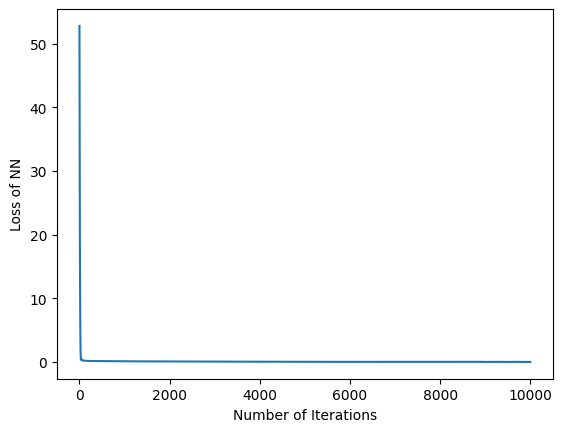

__setattr__ called with name: input_layer and value: <__main__.InputLayer object at 0x12061c6a0> type: <class '__main__.InputLayer'>
Initialization condition passed.
Mean Absolute Error: 0.039933679667838826
Mean Squared Error: 0.0029345934194902955
R-squared: 0.9935587759708727


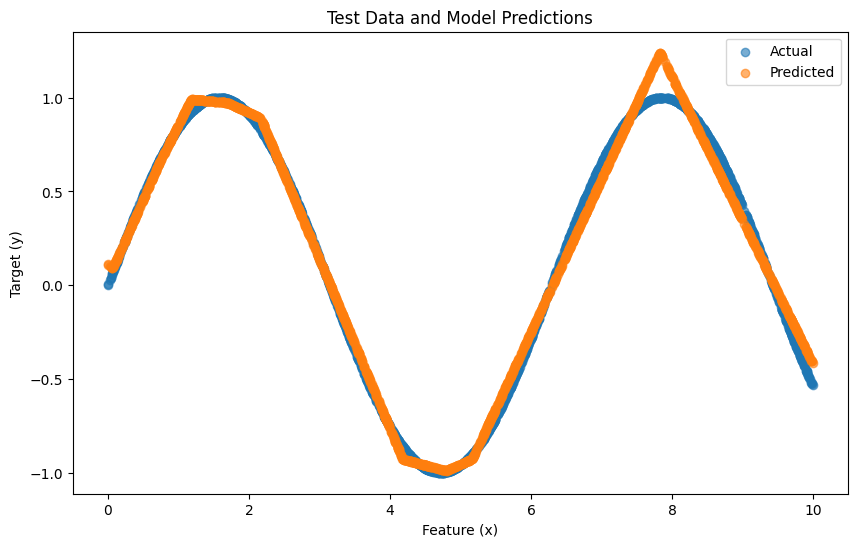

In [81]:
######################################################################################
######  THIS CELL DOES NOT NEED TO BE EDITED!! FEEL FREE TO READ THROUGH IT TO  ###### 
#############  UNDERSTAND HOW ITS BEING USED BUT IT CAN SAFELY BE IGNORED  ###########
######################################################################################
if __name__ == "__main__":
    main()